In [25]:
import cv2
import random 
import numpy as np
from matplotlib import pyplot as plt

In [6]:
img_gray = cv2.imread('./lenna.jpg',0)
cv2.imshow('lenna', img_gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img_gray)
print(img_gray.shape)

[[162 162 162 ... 169 155 128]
 [162 163 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 90  90  93 ...  56  54  60]
 [ 95  95  93 ...  57  58  66]
 [ 89  89  90 ...  59  69  67]]
(480, 512)


In [7]:
img_rgb = cv2.imread('./lenna.jpg',1)
cv2.imshow('lenna', img_rgb)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img_rgb)
print(img_rgb.shape)

[[[121 138 225]
  [128 137 224]
  [132 136 224]
  ...
  [121 145 233]
  [112 128 224]
  [ 91  99 200]]

 [[123 137 225]
  [131 137 226]
  [132 136 224]
  ...
  [124 148 232]
  [114 129 221]
  [ 91 100 197]]

 [[125 137 225]
  [130 136 225]
  [132 136 224]
  ...
  [124 148 232]
  [112 130 221]
  [ 89 101 197]]

 ...

 [[ 79  63 147]
  [ 81  64 145]
  [ 86  67 146]
  ...
  [ 63  29 106]
  [ 61  28 103]
  [ 65  35 108]]

 [[ 84  69 150]
  [ 86  70 148]
  [ 86  68 145]
  ...
  [ 62  31 106]
  [ 63  32 107]
  [ 70  40 115]]

 [[ 78  64 142]
  [ 80  64 142]
  [ 81  65 142]
  ...
  [ 63  34 107]
  [ 71  43 119]
  [ 69  40 120]]]
(480, 512, 3)


In [9]:
# image crop
img_crop = img_rgb[0:100, 0:200]
cv2.imshow('img_crop', img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [10]:
B, G, R = cv2.split(img_rgb)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [8]:
# change color
def random_light_color(img):
    B,G,R = cv2.split(img)
    
    b_rand = random.randint(-50,50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255-b_rand
        B[B>lim]=255
        B[B<=lim]=(b_rand+B[B<=lim]).astype(img_rgb.dtype)
    elif b_rand < 0:
        lim = 0-b_rand
        B[B<lim]=0
        B[B>=lim]=(b_rand+B[B>=lim]).astype(img_rgb.dtype)

    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img_rgb.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img_rgb.dtype)

    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img_rgb.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img_rgb.dtype)

    img_merge = cv2.merge((B,G,R))
    return img_merge

In [9]:
img_rgb = cv2.imread('./lenna.jpg',1)
img_random_color = random_light_color(img_rgb)
cv2.imshow('img_random_color', img_random_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [11]:
# gamma correction
def adjust_gamma(image,gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(image,table)
img_dark = cv2.imread('./lenna.jpg',0)
img_brighter = adjust_gamma(img_dark,2)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


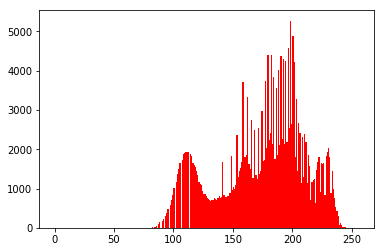

In [29]:
# histogram
img_small_brighter = cv2.resize(img_brighter,(int(img_brighter.shape[0]*0.5),int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(),256,[0,256],color = 'r') #plt.hist(x,num_bins,normed,color)
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel 
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(0)
if key == 27:
    exit()

In [30]:
# rotation
img = cv2.imread('./lenna.jpg',1)
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna_1', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [32]:
# scale+rotation+translation = similarity transform 相似变换
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna_2', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [40]:
# Affine Transform 3个点决定仿射变换
rows,cols,ch = img.shape
pts1 = np.float32([[0,0],[cols-1,0],[0,rows-1]])
pts2 = np.float32([[cols*0.1,rows*0.1],[cols*0.9,rows*0.2],[cols*0.1,rows*0.9]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [ ]:
# perspective transform 4个点8个方程
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
